   Idade  Sexo  Estado Civil  Valor Compras  Frequencia Compras  \
0     56     1             0     324.004894                   2   
1     46     0             1     115.858709                   5   
2     32     0             0     313.598098                   6   
3     60     0             0     328.598535                   7   
4     25     1             0      84.492178                   1   

   Tempo Site (min)  Páginas Visualizadas  Churn  
0                38                    49      0  
1               211                    37      0  
2               444                    26      0  
3               327                    35      0  
4               227                    34      0  


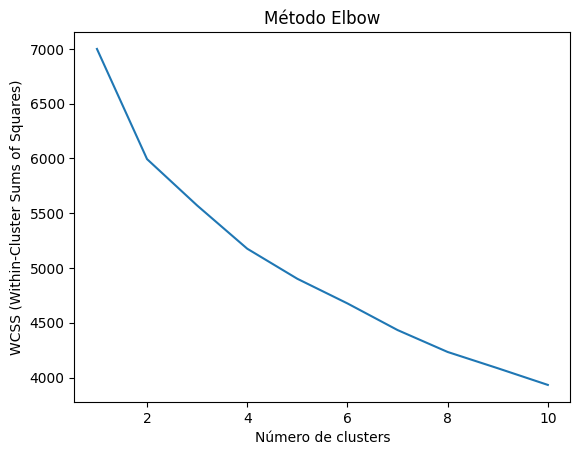

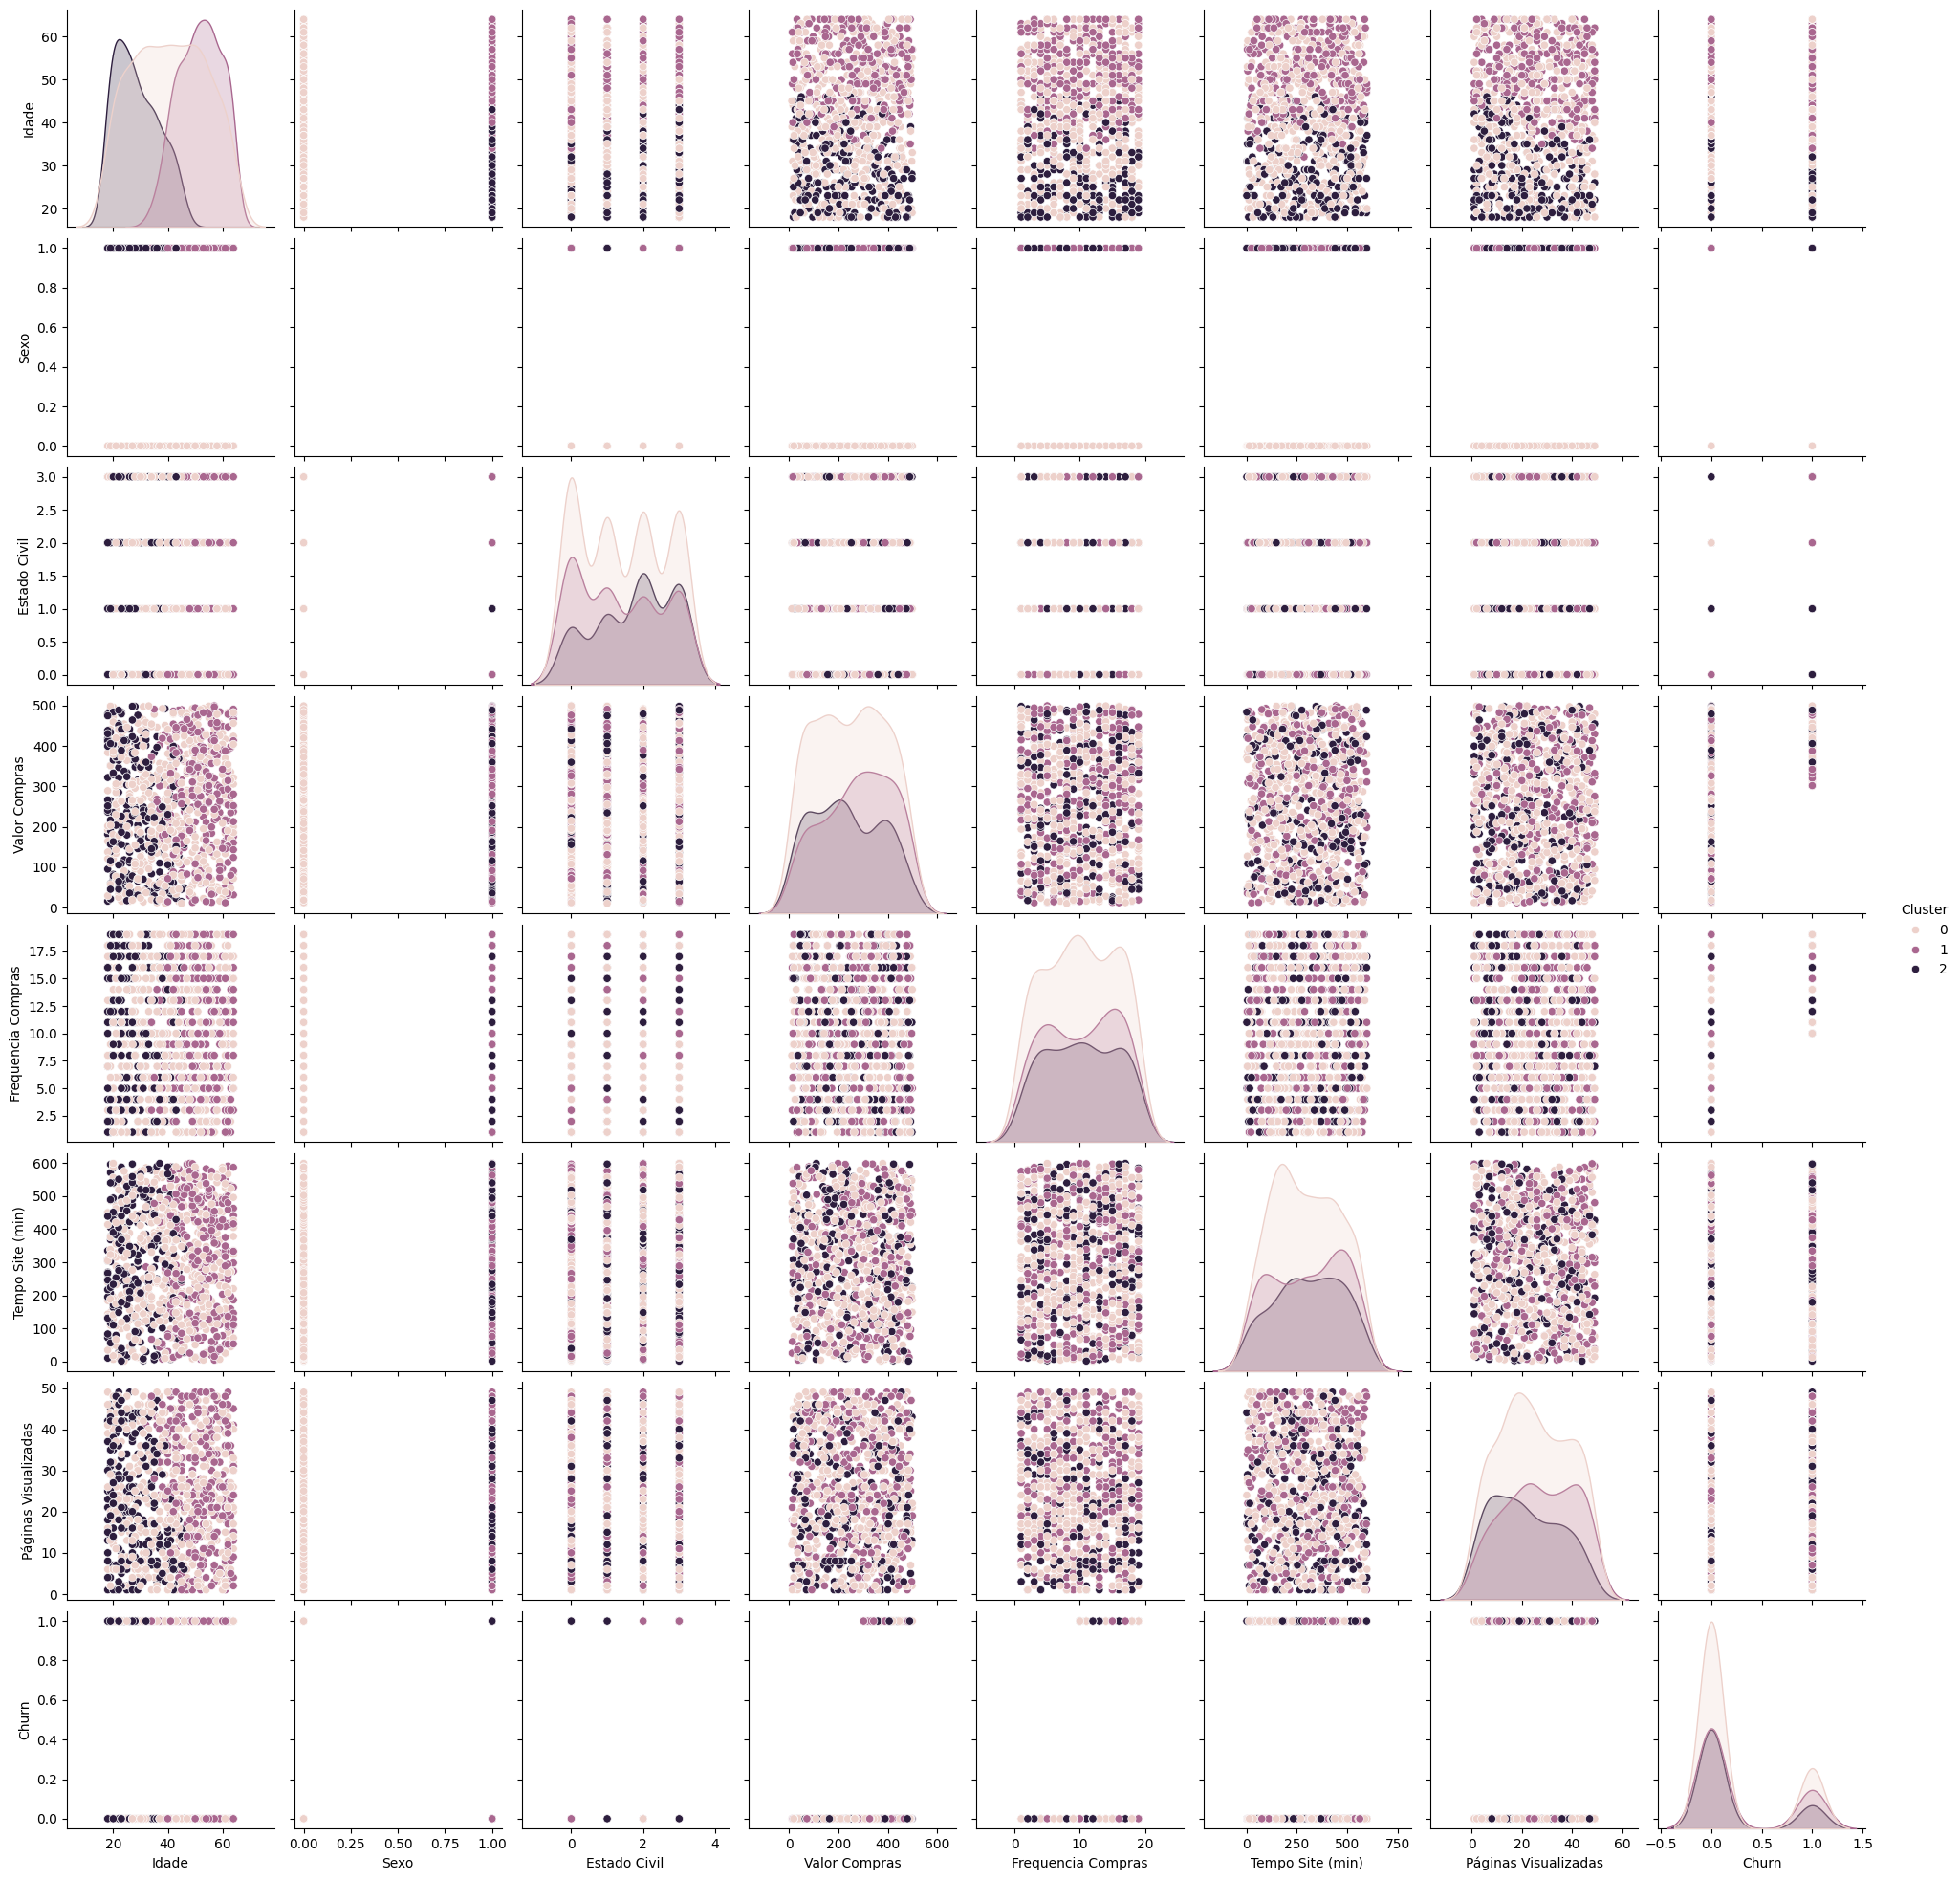

Acurácia: 0.925

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       149
           1       0.91      0.78      0.84        51

    accuracy                           0.93       200
   macro avg       0.92      0.88      0.90       200
weighted avg       0.92      0.93      0.92       200


Matriz de Confusão:
[[145   4]
 [ 11  40]]


In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gerando dados de transações de clientes em um ambiente de comércio eletrônico ( Iniciando cadastro do cliente)
np.random.seed(42)
# define a semente para o gerador de números pseudoaleatórios ( Garante que os mesmos números aleatórios serão gerados sempre que o código for executado, desde que a mesma semente seja usada )

n_clients = 1000

# Informações demográficas ( Onde ficam informações sobre o cliente )
idade = np.random.randint(18, 65, size=n_clients)
sexo = np.random.choice(['Masculino', 'Feminino'], size=n_clients)
estado_civil = np.random.choice(['Solteiro', 'Casado', 'Divorciado', 'Viúvo'], size=n_clients)

# Convertendo variáveis categóricas em numéricas usando Label Encoding ( Convertendo para numeros )
le = LabelEncoder()
sexo_encoded = le.fit_transform(sexo)
estado_civil_encoded = le.fit_transform(estado_civil)

# Histórico de compras ( Registo das compras do cliente, para análise de compras futuras )
valor_compras = np.random.uniform(10, 500, size=n_clients)  # Valor médio de compras em dólares
frequencia_compras = np.random.randint(1, 20, size=n_clients)  # Frequência mensal de compras

# Interações no site ( Veririficar tempo do cliente )
tempo_site_minutos = np.random.randint(1, 600, size=n_clients)  # Tempo médio em minutos que o cliente passa no site
paginas_visualizadas = np.random.randint(1, 50, size=n_clients)  # Número médio de páginas visualizadas por visita

# Criando DataFrame
df = pd.DataFrame({
    'Idade': idade;
    'Sexo': sexo_encoded;
    'Estado Civil': estado_civil_encoded;
    'Valor Compras': valor_compras;
    'Frequencia Compras': frequencia_compras;
    'Tempo Site (min)': tempo_site_minutos;
    'Páginas Visualizadas': paginas_visualizadas;
    'Favoritos' : compras_favoritos;
    'Produtos patrocinados' : patrocinados_interesse;
    'Frete' : frete_correio, frete_parceiro, frete_separado ,frete_incluso;
    'Avaliação do cliente' : avaliacao_cliente, feedback

})

# Adicionando a variável de saída (Churn)
# Suponha que clientes que gastam mais de $300 e visitam o site pelo menos 10 vezes por mês são mais propensos a churnar ( Calcular o bonus que pode ser dado a este cliente )
df['Churn'] = np.where((df['Valor Compras'] > 300) & (df['Frequencia Compras'] >= 10), 1, 0)

# Visualização das primeiras linhas do DataFrame para verificar os dados gerados ( Verificação de dados )
print(df.head())

# Análise de Clusters ( Vamos usar K-means para agrupar clientes com comportamentos semelhantes )
X = df.drop(['Churn'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha do número de clusters usando o método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotagem do gráfico Elbow
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-Cluster Sums of Squares)')
plt.show()

# Clusterização usando K-Means com o número de clusters escolhido
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adicionando os rótulos de cluster ao DataFrame original
df['Cluster'] = cluster_labels

# Visualização dos clusters resultantes
sns.pairplot(df, hue='Cluster')
plt.show()

# Divisão dos Dados ( Separamos os dados em conjuntos de treinamento e teste )
X_train, X_test, y_train, y_test = train_test_split(X, df['Churn'], test_size=0.2, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_scaled)

# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, previsoes))

# Avaliação de favoritos (  Verificar itens para quando hover promoção o cliente ser notificado )
compras_favoritos = np.random.uniform(10, 500, size=n_clients)

#Análise de produtos patrocinados de interesse ( Verificar marca e tipo de produto para oferecer o patrocinado )
patrocinados_interesse = np.random.randint(1, 20, size=n_clients)

#Verificação de frete ( Verificar se o local da entrega é perto de parceiros para oferecer uma melhor espericencia ao cliente)
frete_incluso = np.random.randint(1, 600, size=n_clients)
frete_separado = np.random.randint(1, 50, size=n_clients)
frete_parceiro = np.random.randint(1, 600, size=n_clients)
frete_correio = np.random.randint(1, 50, size=n_clients)

#Avaliação do cliente ( Veriricar experiencia do cliente com o serviço prestado )
avaliacao_cliente = np.random.choice(['Insatisfeito', 'mediano', 'satisfeito'], size=n_clients)
feedback = np.random.choice ( [ ]), size=n_clients

